从下载数据集中生成小数据集：4000张=100*2 + 500*0 + 500*2

In [2]:
import os,shutil

In [3]:
origin_path = '/home/gao/datasets/dogs-vs-cats/train/'#原始数据集本地保存路径
base_path = '/home/gao/datasets/dogs-vs-cats/cats_and_dogs_small'#小数据集保存基路径
os.mkdir(base_path)
#创建训练集、验证集和测试集路径
train_path = os.path.join(base_path,'train')
os.mkdir(train_path)
validation_path = os.path.join(base_path,'validation')
os.mkdir(validation_path)
test_path = os.path.join(base_path,'test')
os.mkdir(test_path)

#创建各自目录下dogs、cats目录
train_cats_dir = os.path.join(train_path,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_path,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_path,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_path,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_path,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_path,'dogs')
os.mkdir(test_dogs_dir)

#在原始路径中复制图片到训练集下:cats,dogs分别复制
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(origin_path,fname)
    dst = os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(origin_path,fname)
    dst = os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(origin_path,fname)
    dst = os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

#复制dogs 图片到相应数据集目录下
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(origin_path,fname)
    dst = os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(origin_path,fname)
    dst = os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(origin_path,fname)
    dst = os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

输出验证一下

In [4]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [5]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [6]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [7]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [8]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [9]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


## 直接在小数据集上进行训练，看结果如何

In [10]:
from keras import models
from keras import layers

In [12]:
#模型构建
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [13]:
#打印模型架构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)             0         
__________

In [14]:
# compile
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(1e-4),metrics=['acc'])

### 数据预处理: 
- 读取磁盘图片文件；
- 转换为张量形式；
- rescale；
- batches。


In [18]:
from keras.preprocessing.image import ImageDataGenerator

# 缩放：除以255；[0,1]之间
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,#训练集路径；其中不同类目录读取为标签；
        target_size=(150, 150),#尺寸定义为150x150；
        batch_size=20,#batch size为20；
        class_mode='binary')#二分类，标签为二分形式

validation_generator = test_datagen.flow_from_directory(
        validation_path,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
print(train_generator)

In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [19]:
#模型训练
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 64s 636ms/step - loss: 0.6898 - acc: 0.5385 - val_loss: 0.6429 - val_acc: 0.6560
Epoch 2/30
100/100 [==============================] - 62s 620ms/step - loss: 0.6038 - acc: 0.6795 - val_loss: 0.6093 - val_acc: 0.6810
Epoch 3/30
100/100 [==============================] - 62s 624ms/step - loss: 0.5436 - acc: 0.7245 - val_loss: 0.6863 - val_acc: 0.6160
Epoch 4/30
100/100 [==============================] - 63s 632ms/step - loss: 0.5149 - acc: 0.7510 - val_loss: 0.6317 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 62s 623ms/step - loss: 0.4761 - acc: 0.7705 - val_loss: 0.5934 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 61s 615ms/step - loss: 0.4415 - acc: 0.8030 - val_loss: 0.6421 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 62s 620ms/step - loss: 0.4048 - acc: 0.8160 - val_loss: 0.6934 - val_acc: 0.6540
Epoch 8/30
100/100 [==============================] - 6

In [20]:
model.save('cats_and_dogs_small_1.h5')#模型保存

### 画图看看训练集、验证集上的损失值和准确率

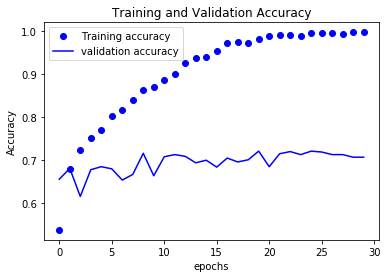

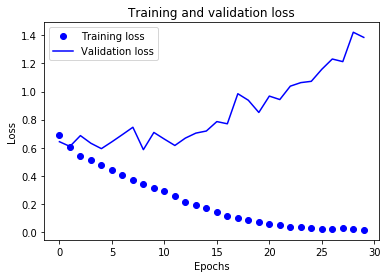

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

模型过拟合。验证集上准确率在70%左右，而训练集上准确率达到100%.
缓解过拟合：数据增强、权重衰减L2正则化、Dropout、特征提取。

### 数据增强

In [24]:
# 类ImageDataGenerator ：定义对图片数据进行的操作
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


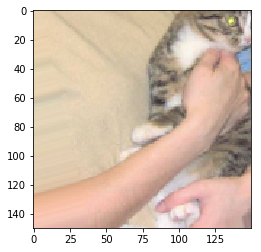

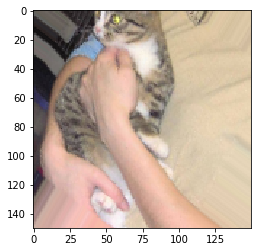

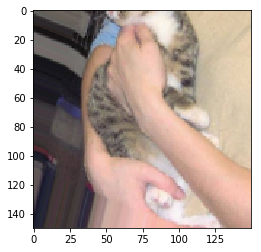

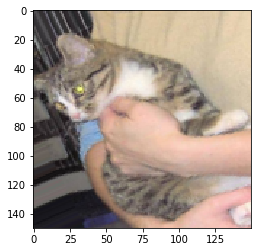

In [28]:
# 对一张图片进行处理，示范一下
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]#‘cats’训练集

#随机找一张图片
index = 13
img_path = fnames[index]

img = image.load_img(img_path,target_size=(150,150))
# 将PIL图片格式转换为numpy数组形式,shape (150, 150, 3)
x = image.img_to_array(img)
# 转换成 (1, 150, 150, 3)
x = x.reshape((1,)+x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):#由x生成batch_size为1的批量，无限循环；break结束循环
    plt.figure(i)
    print(batch.shape)
    imgplot = plt.imshow(image.array_to_img(batch[0]))#第一张图片
    i += 1
    if i % 4 == 0:#显示4张
        break

plt.show()

In [29]:
### 模型重新训练：使用数据增强、Dropout
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [31]:
# 模型compile
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [32]:
# 数据增强生成数据批量：训练数据
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 验证集和测试集 不做数据增强
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_path,target_size=(150,150),batch_size=32,class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_path,target_size=(150,150),
                                                       batch_size=32,class_mode='binary')

history_dg = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 87s 874ms/step - loss: 0.6933 - acc: 0.5203 - val_loss: 0.6839 - val_acc: 0.6123
Epoch 2/30
100/100 [==============================] - 85s 852ms/step - loss: 0.6826 - acc: 0.5556 - val_loss: 0.6660 - val_acc: 0.5723
Epoch 3/30
100/100 [==============================] - 84s 838ms/step - loss: 0.6684 - acc: 0.5931 - val_loss: 0.6393 - val_acc: 0.6345
Epoch 4/30
100/100 [==============================] - 87s 873ms/step - loss: 0.6537 - acc: 0.6047 - val_loss: 0.6164 - val_acc: 0.6580
Epoch 5/30
100/100 [==============================] - 86s 858ms/step - loss: 0.6368 - acc: 0.6412 - val_loss: 0.6381 - val_acc: 0.6269
Epoch 6/30
100/100 [==============================] - 84s 842ms/step - loss: 0.6215 - acc: 0.6488 - val_loss: 0.6460 - val_acc: 0.6066
Epoch 7/30
100/100 [==============================] - 85s 854ms/step - loss: 0.6237 - acc: 0.6550 - val_lo

In [33]:
model.save('cats_and_dogs_small_2.h5')#模型保存

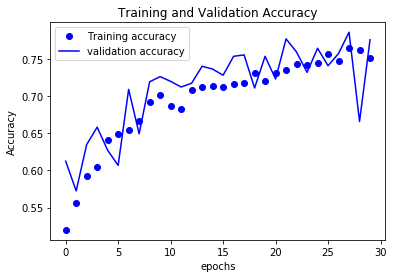

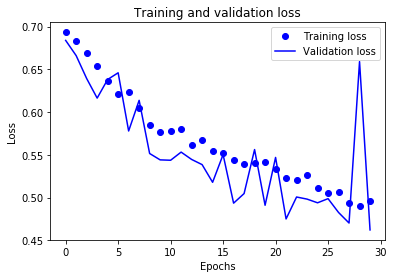

In [34]:
# 画图显示训练集和验证集上的损失值和准确率变化
acc = history_dg.history['acc']
val_acc = history_dg.history['val_acc']

loss = history_dg.history['loss']
val_loss = history_dg.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [41]:
#在测试集上测试
test_generator = test_datagen.flow_from_directory(test_path,target_size=(150,150),batch_size=32,class_mode='binary')

test_loss,test_acc = model.evaluate_generator(test_generator,steps=500,use_multiprocessing=True,verbose=1)

Found 1000 images belonging to 2 classes.
500/500 [==============================] - 112s 224ms/step


In [42]:
test_acc # 提升了5个百分点

0.7539641943734016